## Supplementary Figure: selection coefficient ~= sigma threshold

This file considers selection coefficients that would equate to the "significance" threshold of detectable IBD rate.

13778 comes from the individuals in our TOPMed European analysis.

The selection scan uses 2.0 cM threshold.

The file `extended.ne` is inferred from IBDNe.

In [1]:
from isweep import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',size=14)

In [10]:
Ne = read_Ne('extended.ne') # population size
n = 13778
m = 2 *n
M = m * (m-1) / 2 - m
long_ibd = 2.0

In [61]:
ss = [0.001 * i for i in range(37)]

In [62]:
outs = []
for s in ss:
    vals = []
    for p in ps:
        a,b,c=walk_variant_backward(s,p,Ne)
        numibd = probability_ibd(a,b,long_ibd) * M
        vals.append(numibd)
    out = np.mean(vals)
    outs.append(out)

In [81]:
idx = 17
ss[idx], outs[idx]

(0.017, 72409.29233858595)

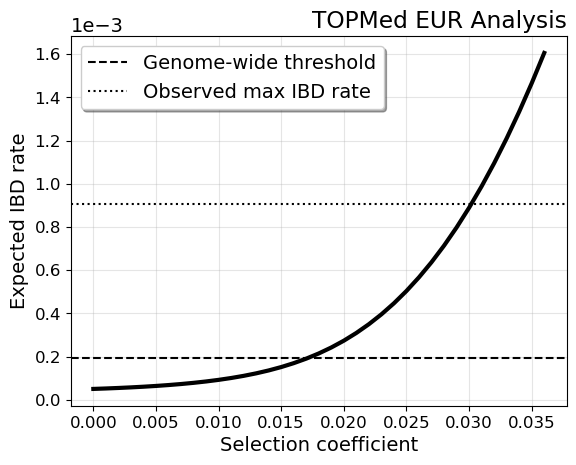

In [82]:
plt.plot(ss,np.array(outs)/M,linewidth=3,color='k')
plt.axhline(74175/M,color='k',linestyle='--',label='Genome-wide threshold')
plt.axhline(344937/M,color='k',linestyle='dotted',label='Observed max IBD rate')
plt.grid(alpha=0.33)
plt.xlabel('Selection coefficient')
plt.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
plt.ylabel('Expected IBD rate')
plt.legend(loc='upper left',
           frameon=True,
           shadow=True,
          )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('TOPMed EUR Analysis',
          loc='right'
         )